In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns

In [2]:
train_1= pd.read_csv("train_1.csv",index_col = 0)
train_2=pd.read_csv("train_2.csv",index_col= 0)
print(train_1.head())
print(train_2.head())

         Gender Married Dependents     Education Self_Employed  \
Loan_ID                                                          
LP001002   Male      No          0      Graduate            No   
LP001003   Male     Yes          1      Graduate            No   
LP001005   Male     Yes          0      Graduate           Yes   
LP001006   Male     Yes          0  Not Graduate            No   
LP001008   Male      No          0      Graduate            No   

          ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
Loan_ID                                                                      
LP001002             5849                  0         NaN             360.0   
LP001003             4583               1508       128.0             360.0   
LP001005             3000                  0        66.0             360.0   
LP001006             2583               2358       120.0             360.0   
LP001008             6000                  0       141.0             

In [3]:
train = pd.concat([train_1,train_2])
train.shape


(614, 12)

In [4]:
train.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:

train.info()
print(train.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
Coapplica

In [6]:
thereshold = len(train) * 0.05
print(thereshold)
cols_to_drop = train.columns[train.isna().sum() <= thereshold]
print(cols_to_drop)
train.dropna(subset = cols_to_drop , inplace = True)

30.700000000000003
Index(['Gender', 'Married', 'Dependents', 'Education', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Property_Area',
       'Loan_Status'],
      dtype='object')


In [7]:
print(train.isna().sum())


Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        30
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       48
Property_Area         0
Loan_Status           0
dtype: int64


In [8]:


filler_self_employ = train["Self_Employed"].value_counts().index[0]
filler_Credit_History = train["Credit_History"].value_counts().index[0]

train["Self_Employed"]  = train["Self_Employed"] .fillna (filler_self_employ)
train["Credit_History"]  = train["Credit_History"] .fillna (filler_Credit_History)
        
print(train)
        
print(train . isnull().sum())
print(train.dtypes)

          Gender Married Dependents     Education Self_Employed  \
Loan_ID                                                           
LP001003    Male     Yes          1      Graduate            No   
LP001005    Male     Yes          0      Graduate           Yes   
LP001006    Male     Yes          0  Not Graduate            No   
LP001008    Male      No          0      Graduate            No   
LP001011    Male     Yes          2      Graduate           Yes   
...          ...     ...        ...           ...           ...   
LP002978  Female      No          0      Graduate            No   
LP002979    Male     Yes         3+      Graduate            No   
LP002983    Male     Yes          1      Graduate            No   
LP002984    Male     Yes          2      Graduate            No   
LP002990  Female      No          0      Graduate           Yes   

          ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
Loan_ID                                           

In [9]:
print(train.isna().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [10]:
train.corr()

C:\Users\TDH\AppData\Local\Temp\ipykernel_12096\2189804198.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.107597,0.529728,-0.040014,-0.049439
CoapplicantIncome,-0.107597,1.000000,0.205801,-0.059338,0.005814
LoanAmount,0.529728,0.205801,1.000000,0.049339,-0.025290
Loan_Amount_Term,-0.040014,-0.059338,0.049339,1.000000,0.026256
Credit_History,-0.049439,0.005814,-0.025290,0.026256,1.000000


In [11]:
print("Therefore , the correlation between Application and Loan Amount is :")
# Correlation between life_exp and happiness_score
corr = train['ApplicantIncome'].corr(train['LoanAmount'])
print(corr)

Therefore , the correlation between Application and Loan Amount is :
0.529727803407427


C:\Users\TDH\AppData\Local\Temp\ipykernel_12096\3160945300.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),annot = True)


<Axes: >

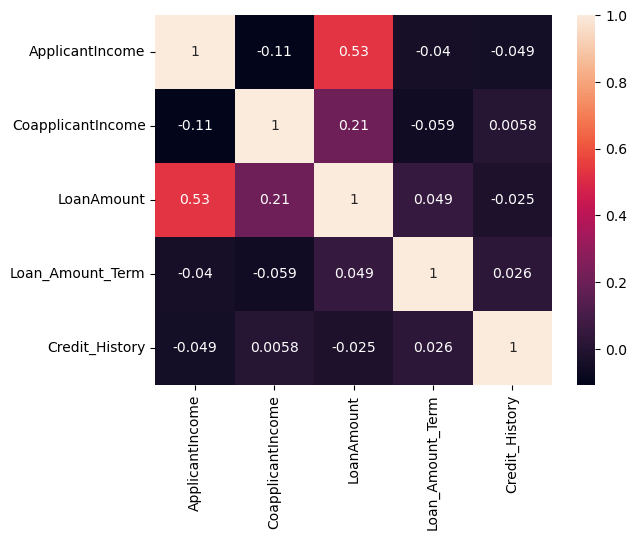

In [12]:
sns.heatmap(train.corr(),annot = True)

<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

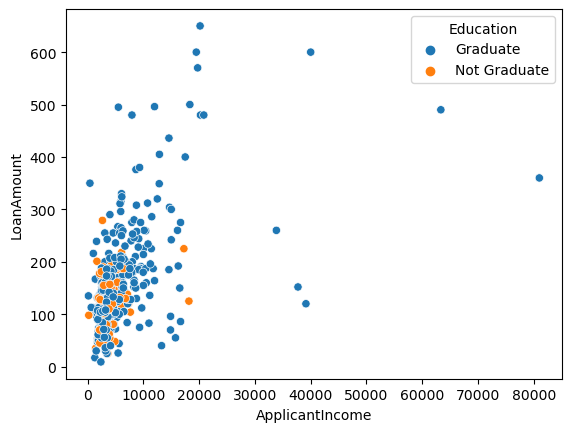

In [13]:
sns.scatterplot(data= train , x="ApplicantIncome",y="LoanAmount",hue="Education")

<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

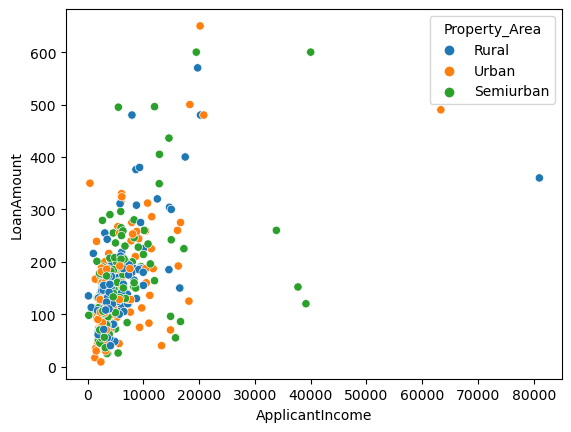

In [14]:
sns.scatterplot(data= train , x="ApplicantIncome",y="LoanAmount",hue="Property_Area")

C:\Users\TDH\AppData\Local\Temp\ipykernel_12096\2178954303.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),annot=True)


<Axes: >

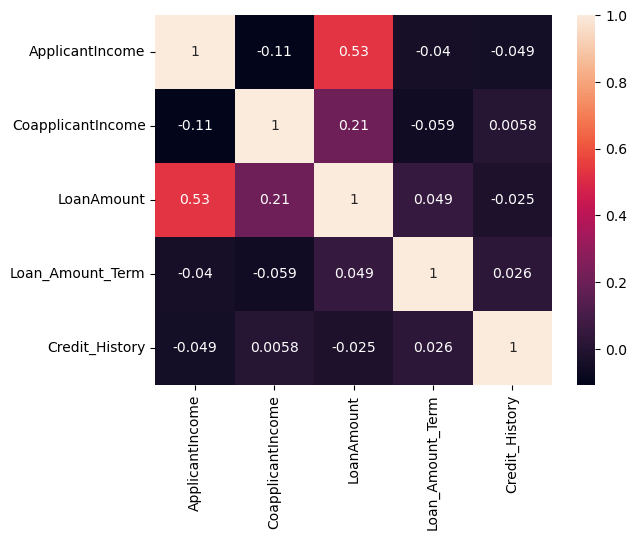

In [16]:
sns.heatmap(train.corr(),annot=True)

## CORRELATION BETWEEN CoapplicationIncome and LoanAmount = 0.21
## CORRELATION BETWEEN Credit History and ApplicantIncome = -0.049.